In [1]:
import sys

import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import moment

sys.path.append("/Users/eleni/Desktop/pymaxent/")
from pymaxent import *

In [2]:
with h5py.File("nz_qp_lens.h5", "r") as f:
    Z_MID = f['Z_MID'][::]
    nz_0 = f['nz_0'][::]

The goal is to test the pymaxent algorithm on a DESC n(z). We will do so as follows:

* Step 1: Generate a mock data set obeying the DESC n(z)
* Step 2: Calculate the moments of the mock sample
* Step 3: Run pymaxent on these moments
* Step 4: Compare the recovered distribution with the DESC n(z)

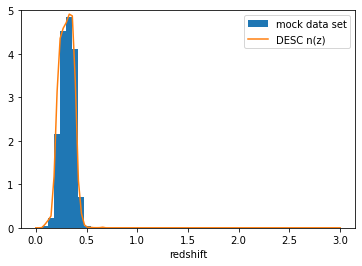

In [24]:
# Step 1

sample = np.random.choice(Z_MID, p = nz_0 / np.sum(nz_0), size = 100000)

plt.hist(sample, density = True, label = 'mock data set')
plt.plot(Z_MID, nz_0, label = 'DESC n(z)')
plt.xlabel("redshift")
plt.legend()
plt.ylim(0, 5)
plt.show()

/Users/eleni/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


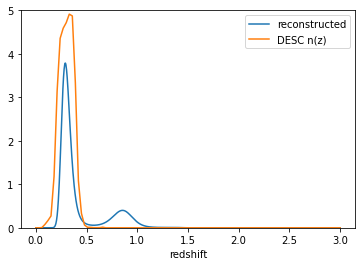

In [26]:
# Step 2

N = 6 # number of moments

moments = []
moments.append(np.mean(sample))

for i in range(N):
    moments.append(moment(sample, moment = i))

# Step 3

bnd_low = min(Z_MID)
bnd_high = max(Z_MID)
x = np.linspace(bnd_low, bnd_high, 1000)

mu = moments
sol, lambdas = reconstruct(mu, bnds=[bnd_low, bnd_high])

plt.plot(x, sol(x), label = 'reconstructed')
plt.plot(Z_MID, nz_0, label = 'DESC n(z)')
plt.ylim(0, 5)
plt.legend()
plt.xlabel("redshift")
plt.show()